In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("Credit.csv")

In [3]:
df.head()

,Credit,RevolvingUtiOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NoOfDependents,NoRealEstateLoansOrLines,NoOfOpenCreditLinesAndLoans,NoofTime30_59DaysPastDue,NoOfTime60_89DaysPastDue,NorOfTimes90DaysLate
0,1,0.766127,45,0.802982,9120,2,6,13,2,0,0
1,0,0.957151,40,0.121876,2600,1,0,4,0,0,0
2,0,0.658180,38,0.085113,3042,0,0,2,1,0,1
3,0,0.233810,30,0.036050,3300,0,0,5,0,0,0
4,0,0.907239,49,0.024926,63588,0,1,7,1,0,0


In [4]:
df.Credit.value_counts()

Credit
0    7509
1     517
Name: count, dtype: int64

In [5]:
df.Credit.value_counts()*100/df.shape[0]

Credit
0    93.558435
1     6.441565
Name: count, dtype: float64

In [6]:
x=df.iloc[:,1:]
y=df.Credit

In [7]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state=2)

In [8]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

In [9]:
x_train_std.shape

(6420, 10)

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Input
from tensorflow.keras.metrics import Precision, Recall
from livelossplot import PlotLossesKerasTF

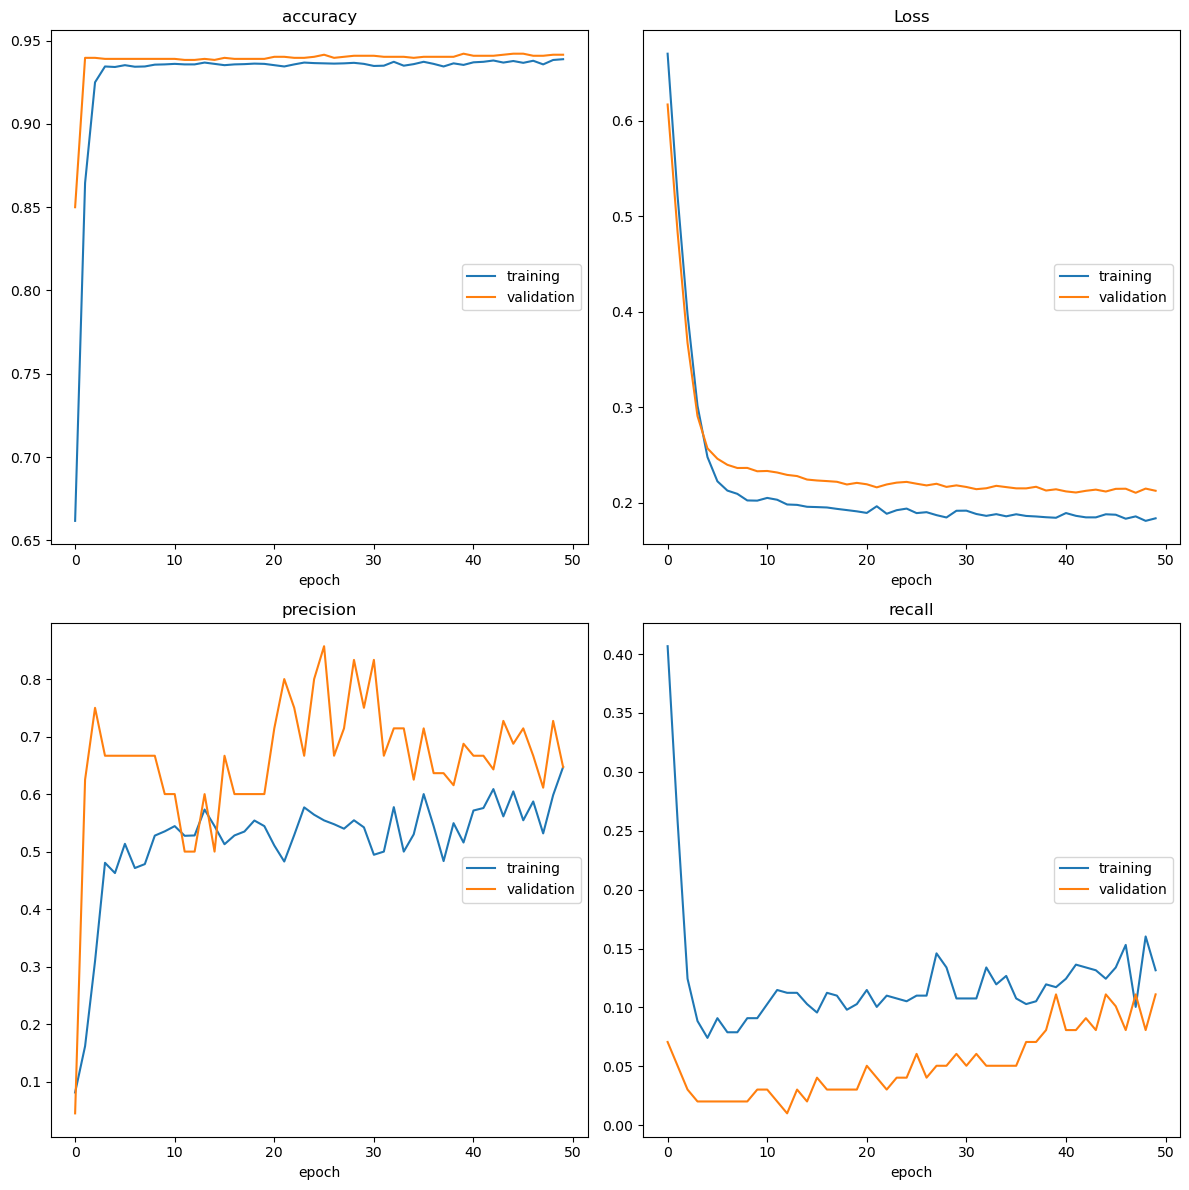

accuracy
	training         	 (min:    0.662, max:    0.939, cur:    0.939)
	validation       	 (min:    0.850, max:    0.942, cur:    0.941)
Loss
	training         	 (min:    0.181, max:    0.671, cur:    0.183)
	validation       	 (min:    0.210, max:    0.617, cur:    0.212)
precision
	training         	 (min:    0.081, max:    0.647, cur:    0.647)
	validation       	 (min:    0.045, max:    0.857, cur:    0.647)
recall
	training         	 (min:    0.074, max:    0.407, cur:    0.132)
	validation       	 (min:    0.010, max:    0.111, cur:    0.111)
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9444 - loss: 0.1690 - precision: 0.5654 - recall: 0.1166 - val_accuracy: 0.9415 - val_loss: 0.2123 - val_precision: 0.6471 - val_recall: 0.1111


In [11]:
model=Sequential()
model.add(Input(shape=(10,)))
model.add(Dense(20,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(20,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',Precision(),Recall()])
model.fit(x_train_std,y_train,epochs=50, batch_size=100,validation_data=(x_test_std,y_test),callbacks=[PlotLossesKerasTF()])

In [22]:

x=df.iloc[:,1:]
y=df.Credit

In [ ]:
#! pip install imblearn

# Random Oversampling

In [26]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
ro=RandomOverSampler()
x_train_oversampled,y_train_oversampled=ro.fit_resample(x,y)

In [30]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_oversampled)))


Original dataset shape Counter({0: 7509, 1: 517})
Resampled dataset shape Counter({1: 7509, 0: 7509})


In [32]:
print(x_train_oversampled.shape)
print(y_train_oversampled.shape)

(15018, 10)
(15018,)


In [34]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split( x_train_oversampled,y_train_oversampled, test_size=0.2, random_state=2)

In [36]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.transform(x_test)

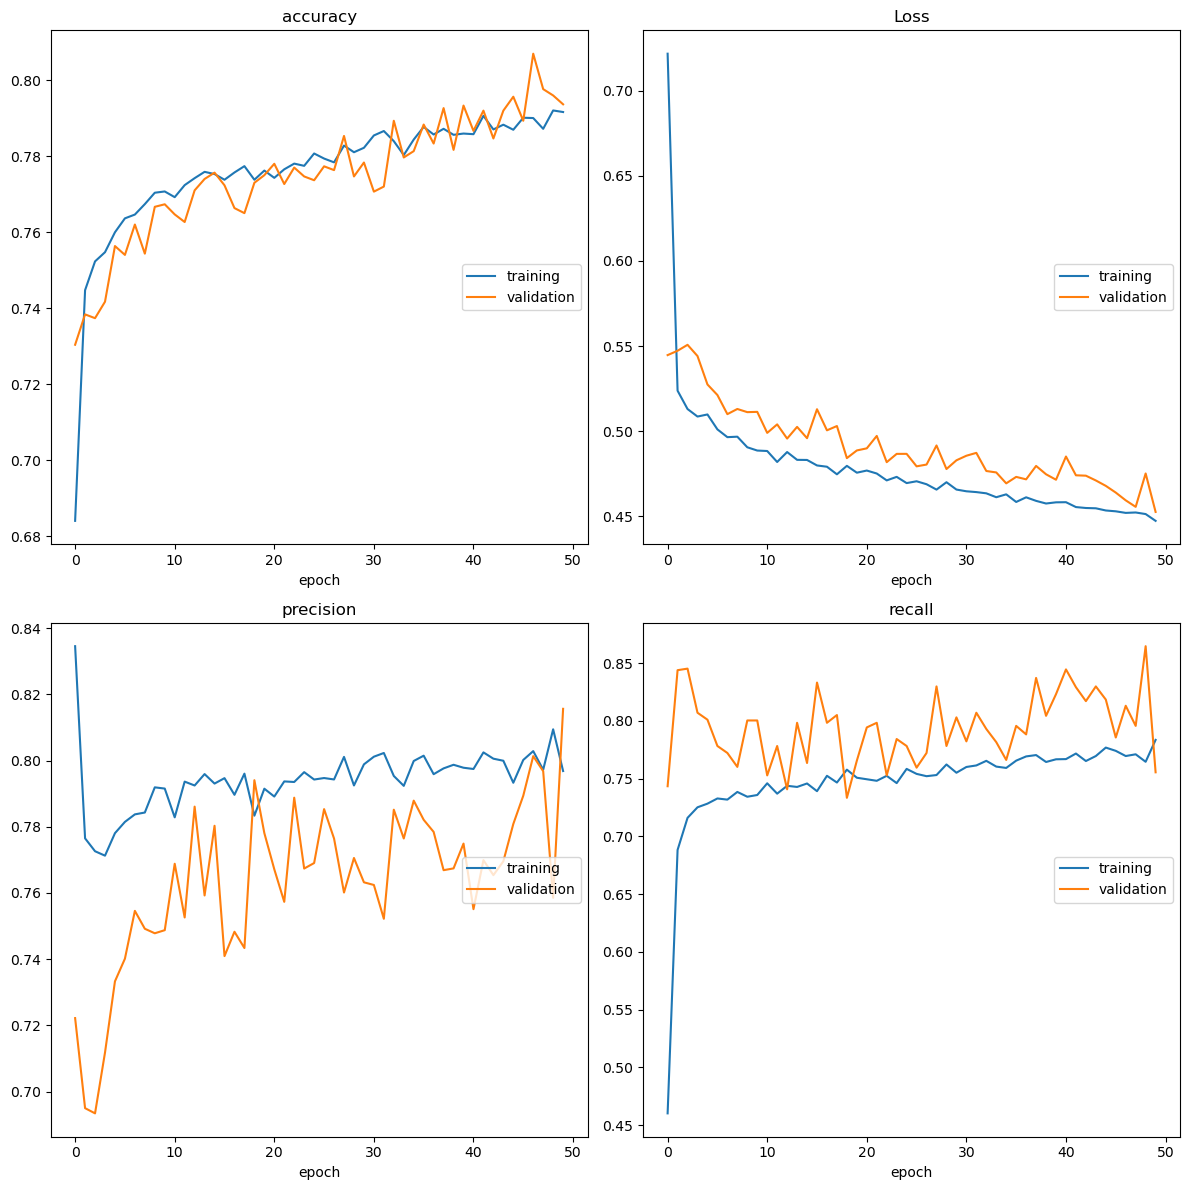

accuracy
	training         	 (min:    0.684, max:    0.792, cur:    0.792)
	validation       	 (min:    0.730, max:    0.807, cur:    0.794)
Loss
	training         	 (min:    0.447, max:    0.722, cur:    0.447)
	validation       	 (min:    0.453, max:    0.551, cur:    0.453)
precision
	training         	 (min:    0.771, max:    0.835, cur:    0.797)
	validation       	 (min:    0.693, max:    0.816, cur:    0.816)
recall
	training         	 (min:    0.460, max:    0.784, cur:    0.784)
	validation       	 (min:    0.733, max:    0.865, cur:    0.756)
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7934 - loss: 0.4417 - precision: 0.8001 - recall: 0.7867 - val_accuracy: 0.7936 - val_loss: 0.4526 - val_precision: 0.8156 - val_recall: 0.7555


In [38]:
model.fit(x_train_std,y_train,epochs=50, batch_size=100,validation_data=(x_test_std,y_test),
          callbacks=[PlotLossesKerasTF()])

# SMOTE

In [40]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
x_train_smote,y_train_smote=smk.fit_resample(x,y)

In [42]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_smote)))

Original dataset shape Counter({0: 7509, 1: 517})
Resampled dataset shape Counter({1: 7509, 0: 7509})


In [44]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(15018, 10)
(15018,)


In [46]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_smote,y_train_smote, test_size=0.2, random_state=2)

In [52]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.fit_transform(x_test)

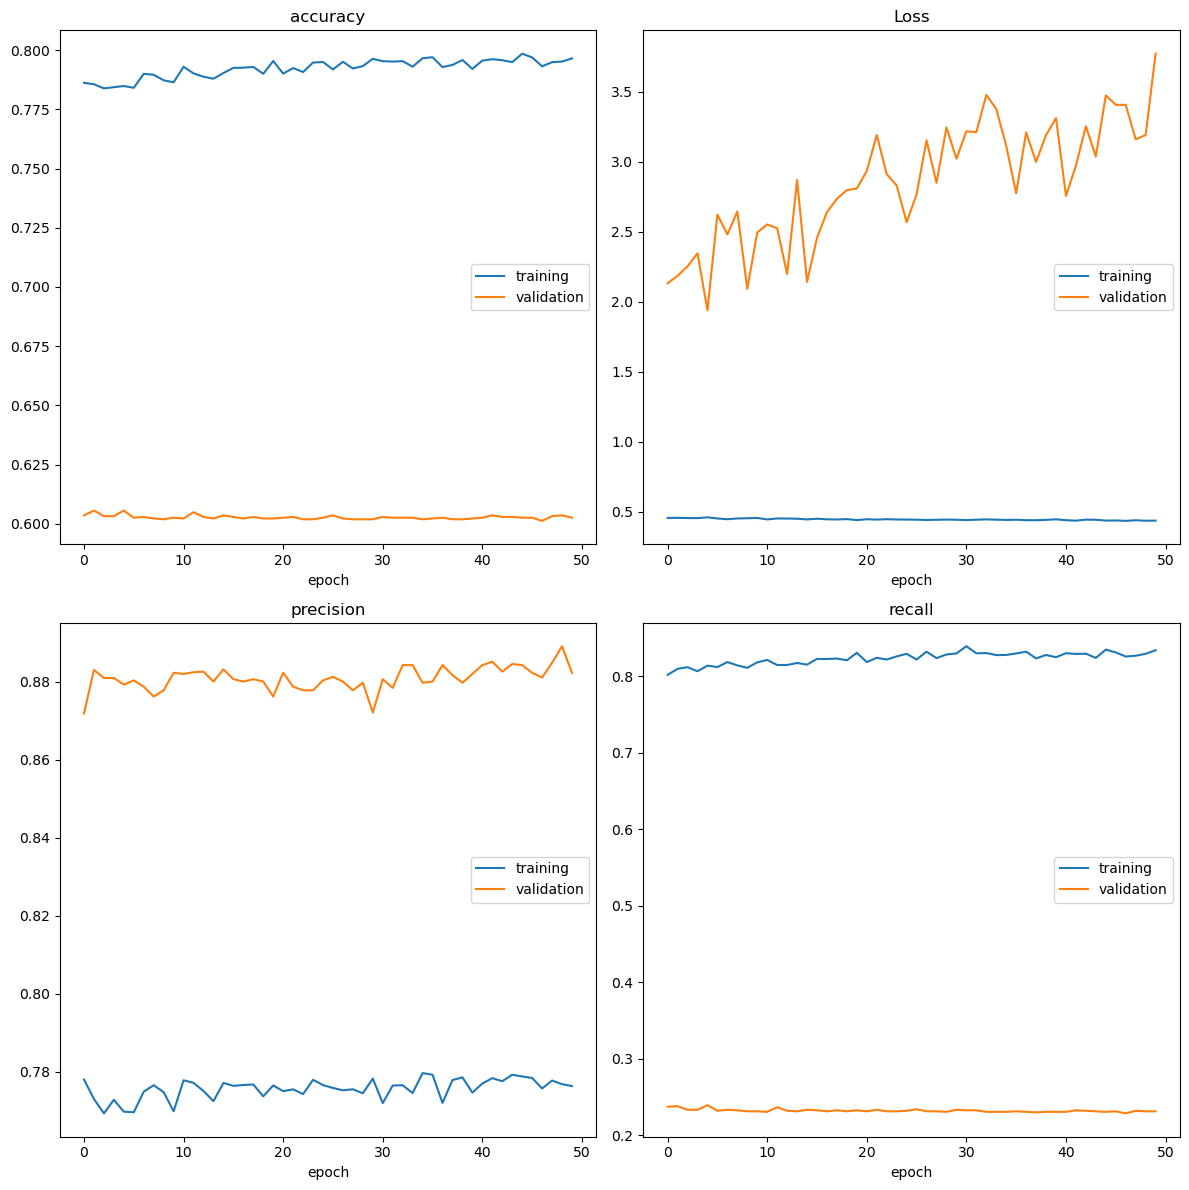

accuracy
	training         	 (min:    0.784, max:    0.798, cur:    0.796)
	validation       	 (min:    0.601, max:    0.606, cur:    0.603)
Loss
	training         	 (min:    0.436, max:    0.462, cur:    0.438)
	validation       	 (min:    1.940, max:    3.771, cur:    3.771)
precision
	training         	 (min:    0.769, max:    0.780, cur:    0.776)
	validation       	 (min:    0.872, max:    0.889, cur:    0.882)
recall
	training         	 (min:    0.802, max:    0.839, cur:    0.834)
	validation       	 (min:    0.228, max:    0.239, cur:    0.231)
121/121 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.7981 - loss: 0.4364 - precision: 0.7747 - recall: 0.8405 - val_accuracy: 0.6025 - val_loss: 3.7708 - val_precision: 0.8824 - val_recall: 0.2311


In [54]:

model.fit(x_train_std,y_train,epochs=50, batch_size=100,validation_data=(x_test_std,y_test),
          callbacks=[PlotLossesKerasTF()])
